## 1. 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Matplotlib 그래프를 노트북 내에 표시
%matplotlib inline

## 2. 데이터 로드 및 전처리

In [2]:
# 데이터 로드
digits = datasets.load_digits()
images = digits.images
targets = digits.target

n_samples = len(images)
X_data = images.reshape((n_samples, 8, 8, 1))

# 픽셀 값 정규화 (0-16 범위를 0-1 범위로)
X_data_scaled = X_data / 16.0

# 레이블 원-핫 인코딩
y_data_categorical = to_categorical(targets, num_classes=10)

# 데이터 분할 (학습 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(
    X_data_scaled, y_data_categorical, test_size=0.2, random_state=42, stratify=targets
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# 입력 이미지의 형태 확인
input_shape = X_train.shape[1:]
print(f"Input shape for CNN: {input_shape}")

X_train shape: (1437, 8, 8, 1)
y_train shape: (1437, 10)
X_test shape: (360, 8, 8, 1)
y_test shape: (360, 10)
Input shape for CNN: (8, 8, 1)


## 3. CNN 모델 정의

In [3]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    # Dense Layers
    Dense(64, activation='relu'),
    Dropout(0.5), # 과적합 방지를 위한 Dropout
    Dense(10, activation='softmax') # 10개 클래스에 대한 출력, softmax 활성화
])

# 모델 요약 출력
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,914 (140.29 KB)

 Trainable params: 35,914 (140.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. 모델 컴파일

In [4]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 5. 모델 학습

In [5]:
epochs = 50
batch_size = 32

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1 # 학습 과정 출력
)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.2050 - loss: 2.2393 - val_accuracy: 0.8250 - val_loss: 1.8649
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5212 - loss: 1.6756 - val_accuracy: 0.8556 - val_loss: 0.9081
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7239 - loss: 0.9552 - val_accuracy: 0.8750 - val_loss: 0.5273
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8058 - loss: 0.6608 - val_accuracy: 0.9306 - val_loss: 0.2960
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8721 - loss: 0.4799 - val_accuracy: 0.9444 - val_loss: 0.2315
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8949 - loss: 0.3664 - val_accuracy: 0.9444 - val_loss: 0.1729
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8933 - loss: 0.3218 - val_accuracy: 0.9528 - val_loss: 0.1528
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9025 - loss: 0.3067 - val_accuracy: 0.9639 - val_loss

## 6. 학습 과정 시각화

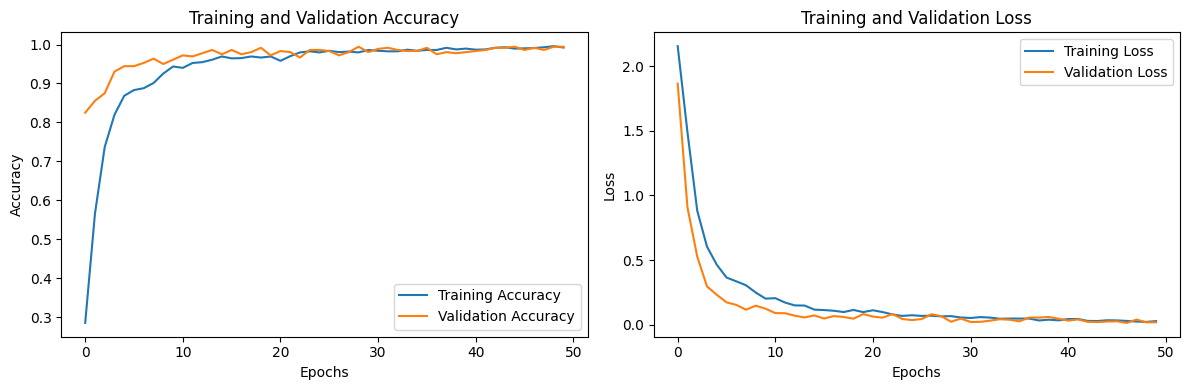

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

## 7. 모델 평가

In [7]:
# 테스트 데이터에 대한 손실 및 정확도 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'\nTest Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# 예측 수행
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) # 확률에서 클래스 레이블로 변환
y_true_classes = np.argmax(y_test, axis=1) # 원-핫 인코딩된 테스트 레이블을 클래스 레이블로 변환

print('\nClassification Report:')
print(classification_report(y_true_classes, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true_classes, y_pred_classes))


Test Accuracy: 0.9944
Test Loss: 0.0184
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      0.94      0.97        35
           9       0.97      1.00      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0 

## 8. 단일 이미지 예측 및 시각화

테스트 데이터셋에서 임의의 이미지를 선택하여 예측하고 시각화합니다.

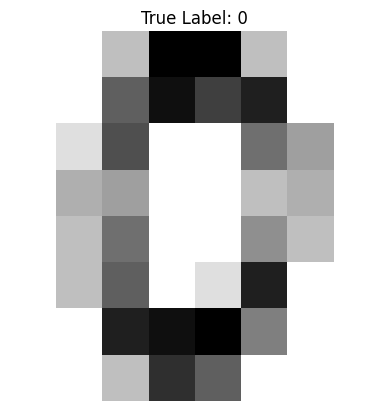

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Label: 0


In [9]:
sample_idx = 10
img_to_predict = X_test[sample_idx]
true_label_one_hot = y_test[sample_idx]
true_label_class = np.argmax(true_label_one_hot)

img_to_show = img_to_predict.reshape(8, 8) * 16.0

plt.imshow(img_to_show, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"True Label: {true_label_class}")
plt.axis('off')
plt.show()

img_for_model_input = np.expand_dims(img_to_predict, axis=0)
prediction_probs = model.predict(img_for_model_input)
predicted_label_class = np.argmax(prediction_probs, axis=1)[0]

print(f"Predicted Label: {predicted_label_class}")